# **Classification using Logistic Regression**


Marquez, Keith Leigh Zhen R.

Objective(s):

This activity aims to demonstrate how to apply simple linear regression analysis to solve regression problem

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

# metadata
print(cervical_cancer_risk_factors.metadata)

# variable information
print(cervical_cancer_risk_factors.variables)

{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

# Data Wrangling

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cc = pd.concat([X,y], axis=1)
cc

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
cc.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [ ]:
cc_null=cc.isnull().sum()
cc_null

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
for column in cc.columns:
    cc[column] = cc[column].fillna(cc[column].mode()[0])
cc.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
cc

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,1.0,1.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,1.0,1.0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0


# Remove duplicates

In [ ]:
# Check for duplicates
duplicate_rows = cc.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 28


In [ ]:
cc.drop_duplicates(inplace=True)
cc

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,1.0,1.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,1.0,1.0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0


In [ ]:
cc.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,...,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,27.075904,2.540964,17.010843,2.222892,0.148193,1.241765,0.461333,0.696386,2.031005,0.100000,...,1.439759,1.412048,0.021687,0.010843,0.021687,0.028916,0.042169,0.087952,0.051807,0.065060
std,8.479609,1.656987,2.817510,1.445331,0.355505,4.122522,2.245822,0.460095,3.639632,0.300181,...,2.237009,2.148043,0.145746,0.103628,0.145746,0.167671,0.201095,0.283396,0.221771,0.246781
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA

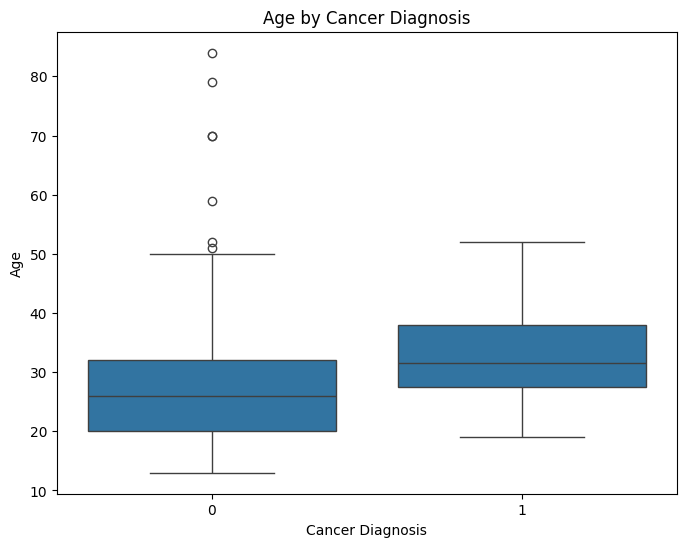

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dx:Cancer', y='Age', data=cc)
plt.xlabel('Cancer Diagnosis')
plt.ylabel('Age')
plt.title('Age by Cancer Diagnosis')
plt.show()

This compares the age distribution of individuals with and without a cancer diagnosis. Both groups have similar median ages around 40, but the non-diagnosed group has a wider range of ages due to outliers.

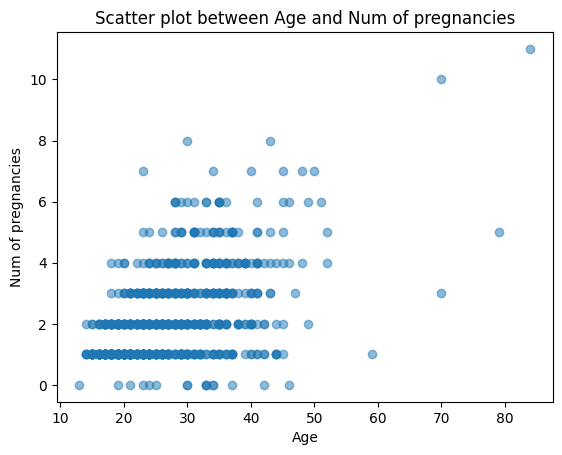

In [ ]:
plt.scatter(cc['Age'], cc['Num of pregnancies'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Num of pregnancies')
plt.title('Scatter plot between Age and Num of pregnancies')
plt.show()

Most pregnancies occur between ages 20 and 50, with fewer occurrences in individuals below 20 or above 50. Age significantly influences pregnancy likelihood, with peak reproductive years around 20 to 50.

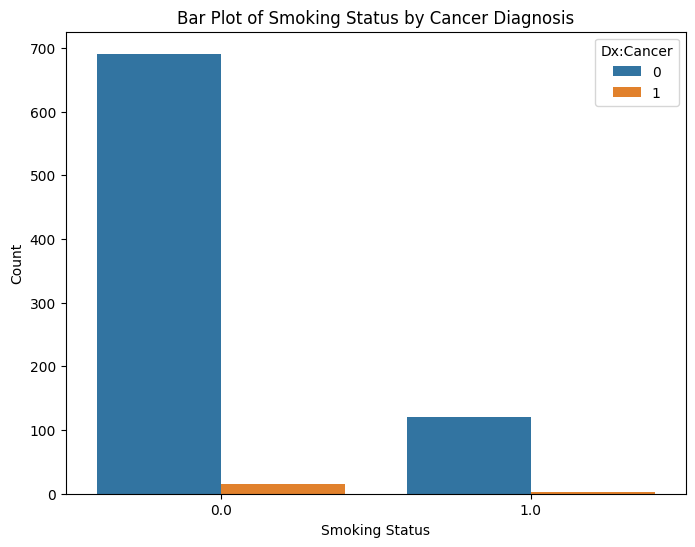

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Smokes', hue='Dx:Cancer', data=cc)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Bar Plot of Smoking Status by Cancer Diagnosis')
plt.show()

Non-smokers (smoking status 0.0) are less likely to be diagnosed with cancer, while smokers (smoking status 1.0) have a higher proportion of cancer diagnoses. The data suggests a potential link between smoking and cancer risk.

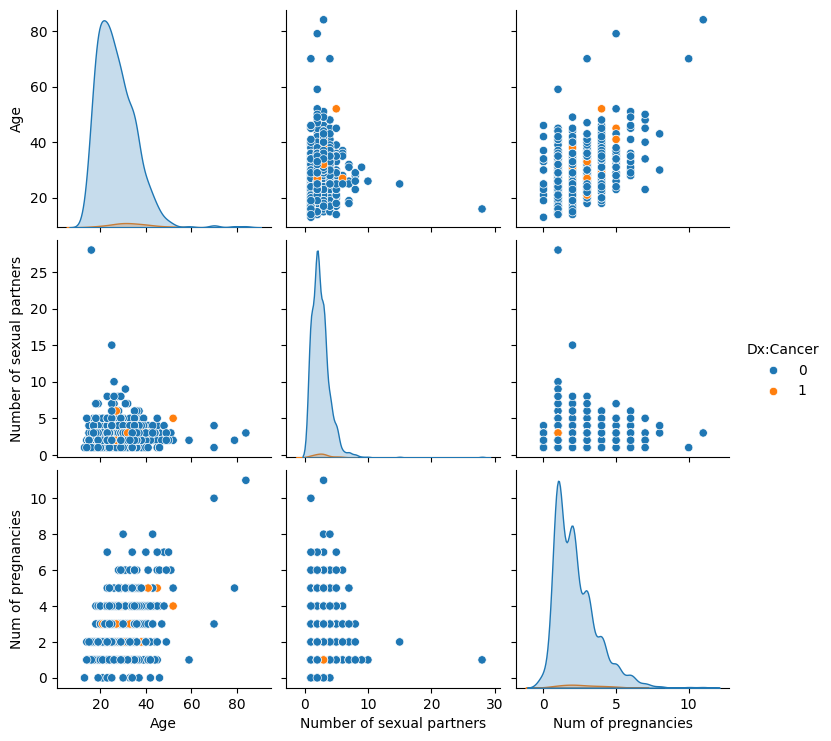

In [ ]:
# Pairplot for selected numerical columns
sns.pairplot(cc[['Age', 'Number of sexual partners', 'Num of pregnancies', 'Dx:Cancer']], hue='Dx:Cancer')
plt.show()

This indicates that most individuals are young adults with fewer sexual partners and pregnancies. A small proportion has been diagnosed with cancer, but there is no clear pattern suggesting a direct association between these factors and cancer risk from the graphs alone.

# Simple Linear Regression and Demonstration of Logistic Regression

# Split data into separate training and test set

In [ ]:
X = cc.drop('Biopsy', axis=1)
y = cc['Biopsy']

In [ ]:
from sklearn.model_selection import train_test_split

# Split x and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (664, 35)
Shape of X_test: (166, 35)


In [ ]:
X_train.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [ ]:
#display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != "0"]
numerical

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology']

# Engineering outliears in numerical variables

In [ ]:
def max_value(df, variable, top):
    return np.where(df[variable] > top, top, df[variable])

numerical_columns = [
    'Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
    'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',
    'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
    'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
    'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
    'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann',
    'Schiller', 'Citology'
]

In [ ]:
# Apply max_value function to each numerical column
for df in [X_train, X_test]:
    df['Age'] = max_value(df, 'Age', 100)  # Assuming 100 is the maximum allowable age
    df['Number of sexual partners'] = max_value(df, 'Number of sexual partners', 10)  # Example threshold
    # Repeat this process for other numerical columns

Maximum values after transformation:

In [ ]:
# Check the maximum values after transformation
print("X_train:", X_train[numerical_columns].max())

X_train: Age                                   70.0
Number of sexual partners             10.0
First sexual intercourse              32.0
Num of pregnancies                     8.0
Smokes                                 1.0
Smokes (years)                        37.0
Smokes (packs/year)                   37.0
Hormonal Contraceptives                1.0
Hormonal Contraceptives (years)       30.0
IUD                                    1.0
IUD (years)                           19.0
STDs                                   1.0
STDs (number)                          4.0
STDs:condylomatosis                    1.0
STDs:cervical condylomatosis           0.0
STDs:vaginal condylomatosis            1.0
STDs:vulvo-perineal condylomatosis     1.0
STDs:syphilis                          1.0
STDs:pelvic inflammatory disease       1.0
STDs:genital herpes                    1.0
STDs:molluscum contagiosum             1.0
STDs:AIDS                              0.0
STDs:HIV                               1.0
ST

In [ ]:
print("X_test:", X_test[numerical_columns].max())

X_test: Age                                   84.0
Number of sexual partners             10.0
First sexual intercourse              28.0
Num of pregnancies                    11.0
Smokes                                 1.0
Smokes (years)                        24.0
Smokes (packs/year)                   21.0
Hormonal Contraceptives                1.0
Hormonal Contraceptives (years)       22.0
IUD                                    1.0
IUD (years)                           10.0
STDs                                   1.0
STDs (number)                          2.0
STDs:condylomatosis                    1.0
STDs:cervical condylomatosis           0.0
STDs:vaginal condylomatosis            0.0
STDs:vulvo-perineal condylomatosis     1.0
STDs:syphilis                          1.0
STDs:pelvic inflammatory disease       0.0
STDs:genital herpes                    0.0
STDs:molluscum contagiosum             0.0
STDs:AIDS                              0.0
STDs:HIV                               1.0
STD

In [ ]:
X_train[numerical_columns].describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,664.000000,664.000000,664.000000,664.00000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,...,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,27.060241,2.484940,17.025602,2.25000,0.146084,1.258027,0.475850,0.691265,1.916573,0.096386,...,0.096386,1.487952,1.453313,0.019578,0.012048,0.022590,0.028614,0.040663,0.082831,0.046687
std,7.905894,1.318078,2.782884,1.39299,0.353457,4.218211,2.332357,0.462320,3.499791,0.295342,...,0.319859,2.414731,2.312192,0.138650,0.109183,0.148706,0.166846,0.197656,0.275835,0.211126
min,14.000000,1.000000,10.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.00000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.00000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,70.000000,10.000000,32.000000,8.00000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Scaling

In [ ]:
X_train.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,664.000000,664.000000,664.000000,664.00000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,...,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,27.060241,2.484940,17.025602,2.25000,0.146084,1.258027,0.475850,0.691265,1.916573,0.096386,...,0.096386,1.487952,1.453313,0.019578,0.012048,0.022590,0.028614,0.040663,0.082831,0.046687
std,7.905894,1.318078,2.782884,1.39299,0.353457,4.218211,2.332357,0.462320,3.499791,0.295342,...,0.319859,2.414731,2.312192,0.138650,0.109183,0.148706,0.166846,0.197656,0.275835,0.211126
min,14.000000,1.000000,10.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.00000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.00000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,70.000000,10.000000,32.000000,8.00000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
X_train= pd.DataFrame (X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame (X_test, columns=[cols])

In [ ]:
X_train.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,...,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,0.233219,0.164993,0.319346,0.281250,0.146084,0.034001,0.012861,0.691265,0.063886,0.096386,...,0.032129,0.023236,0.021586,0.019578,0.012048,0.022590,0.028614,0.040663,0.082831,0.046687
std,0.141177,0.146453,0.126495,0.174124,0.353457,0.114006,0.063037,0.462320,0.116660,0.295342,...,0.106620,0.114987,0.110104,0.138650,0.109183,0.148706,0.166846,0.197656,0.275835,0.211126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.111111,0.227273,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.214286,0.111111,0.318182,0.250000,0.000000,0.000000,0.000000,1.000000,0.008333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.321429,0.222222,0.363636,0.375000,0.000000,0.000000,0.000000,1.000000,0.066667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model
logreg = LogisticRegression(solver='liblinear', random_state=42)  # Adjust solver and random_state as needed

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

# Predict results

In [ ]:
y_pred_test=logreg.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#probability
logreg.predict_proba(X_test)[:,0]

array([0.97167814, 0.98621904, 0.97548734, 0.97972786, 0.98367934,
       0.97696824, 0.98450894, 0.98362969, 0.98431934, 0.97699586,
       0.98030213, 0.98187561, 0.97602653, 0.40791458, 0.98165476,
       0.95004821, 0.97979568, 0.97847942, 0.97929069, 0.93925603,
       0.98250452, 0.9709148 , 0.98038387, 0.69087378, 0.98028688,
       0.97448159, 0.9803807 , 0.98292581, 0.97990914, 0.98114977,
       0.97404099, 0.98294775, 0.96048621, 0.98351494, 0.98593851,
       0.97606419, 0.9565455 , 0.98057819, 0.97549488, 0.98791546,
       0.98474134, 0.97960026, 0.35920079, 0.9704203 , 0.94747769,
       0.97948509, 0.97877902, 0.40118625, 0.96721231, 0.98209548,
       0.98650188, 0.97285332, 0.98067339, 0.97352784, 0.98302117,
       0.98577423, 0.96692052, 0.98365639, 0.98816839, 0.48103242,
       0.98057753, 0.28532274, 0.98055511, 0.98300654, 0.98142108,
       0.97883932, 0.97356948, 0.97790029, 0.98877925, 0.95339285,
       0.98452563, 0.98644564, 0.97396277, 0.98040971, 0.98585

In [ ]:
logreg.predict_proba(X_test)[:,1]

array([0.02832186, 0.01378096, 0.02451266, 0.02027214, 0.01632066,
       0.02303176, 0.01549106, 0.01637031, 0.01568066, 0.02300414,
       0.01969787, 0.01812439, 0.02397347, 0.59208542, 0.01834524,
       0.04995179, 0.02020432, 0.02152058, 0.02070931, 0.06074397,
       0.01749548, 0.0290852 , 0.01961613, 0.30912622, 0.01971312,
       0.02551841, 0.0196193 , 0.01707419, 0.02009086, 0.01885023,
       0.02595901, 0.01705225, 0.03951379, 0.01648506, 0.01406149,
       0.02393581, 0.0434545 , 0.01942181, 0.02450512, 0.01208454,
       0.01525866, 0.02039974, 0.64079921, 0.0295797 , 0.05252231,
       0.02051491, 0.02122098, 0.59881375, 0.03278769, 0.01790452,
       0.01349812, 0.02714668, 0.01932661, 0.02647216, 0.01697883,
       0.01422577, 0.03307948, 0.01634361, 0.01183161, 0.51896758,
       0.01942247, 0.71467726, 0.01944489, 0.01699346, 0.01857892,
       0.02116068, 0.02643052, 0.02209971, 0.01122075, 0.04660715,
       0.01547437, 0.01355436, 0.02603723, 0.01959029, 0.01414

# Check accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9639


Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training accuracy score: 0.9623


Check for overfitting and underfitting

In [ ]:
#print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9623
Test set score: 0.9639


In [ ]:
#fit the Logsitic Regression model with C-100
#instantiate the model
logreg100 = LogisticRegression (C=100, solver='liblinear', random_state=0)
#fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
#print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9654
Test set score: 0.9518


Compare model accuracy with null accuracy

In [ ]:
#check class distribution in test set
y_test.value_counts()

Biopsy
0    155
1     11
Name: count, dtype: int64

In [ ]:
#check null accuracy score
null_accuracy= (155/(155+11))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9337


# Confusion Matrix

In [ ]:
#Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives (TP)=', cm[0,0])
print('\nTrue Negatives (TN)=', cm[1,1])
print('\nFalse Positives (FP)=', cm[0,1])
print('\nFalse Negatives (FN)=', cm[1,0])

Confusion matrix

 [[151   4]
 [  2   9]]

True Positives (TP)= 151

True Negatives (TN)= 9

False Positives (FP)= 4

False Negatives (FN)= 2


<Axes: >

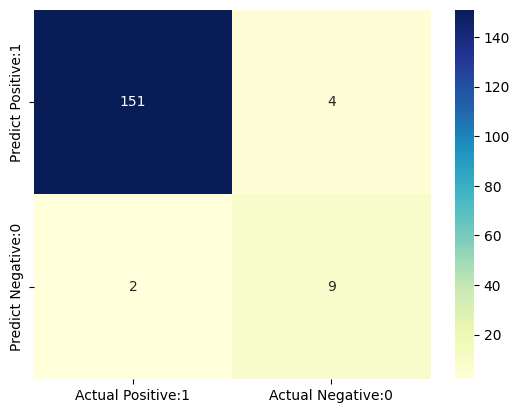

In [ ]:
#visualize confusion matrix with seaborn heatmap
cm_matrix=pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                       index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

The confusion matrix represents the performance of a classification model. It shows the number of true positives (correctly predicted positive instances), true negatives (correctly predicted negative instances), false positives (incorrectly predicted positive instances), and false negatives (incorrectly predicted negative instances). The model has high true positives, indicating good performance in identifying the positive class. However, there are more false positives than false negatives, suggesting potential bias. Further improvements could enhance precision and recall.

# Classification Metrices

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       155
           1       0.69      0.82      0.75        11

    accuracy                           0.96       166
   macro avg       0.84      0.90      0.87       166
weighted avg       0.97      0.96      0.97       166



Classification accuracy

In [ ]:
TP= cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
#print classification accuracy
classification_accuracy=(TP+TN) / float(TP + TN+FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.9639


Classification error

In [ ]:
#print classification error
classification_error= (FP+ FN) / float (TP+ TN+FP+ FN)
print('Classification error: {0:0.4f}'.format(classification_error))

Classification error: 0.0361


Precision

In [ ]:
#print precision score
precision=TP/float(TP+FP)
print('Precision {0:0.4f}'.format(precision))

Precision 0.9742


Recall

In [ ]:
recall=TP/float (TP + FN)
print('Recall or Sensitivity: {0:0.4f}'.format(recall))

Recall or Sensitivity: 0.9869


True Positive Rate

In [ ]:
true_positive_rate= TP / float(TP + FN)
print('True Positive Rate: {0:0.4f}'.format(true_positive_rate))

True Positive Rate: 0.9869


False Positive Rate

In [ ]:
false_positive_rate= FP / float (FP + TN)
print('False Positive Rate: {0:0.4f}'.format(false_positive_rate))

False Positive Rate: 0.3077


Specificity

In [ ]:
specificity=TN/ (TN+FP)
print('Specificity {0:0.4f}'.format(specificity))

Specificity 0.6923


Adjusting the threshold level

In [ ]:
#print the first 18 predicted probabilities of two classes 8 and 1
y_pred_prob = logreg.predict_proba(X_test)[8:10]
y_pred_prob

array([[0.98431934, 0.01568066],
       [0.97699586, 0.02300414]])

In [ ]:
#store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of No cancer (0)', 'Prob of cancer (1)'])
y_pred_prob_df

,Prob of No cancer (0),Prob of cancer (1)
0,0.984319,0.015681
1,0.976996,0.023004


In [ ]:
logreg.predict_proba (X_test) [0:10, 1]

array([0.02832186, 0.01378096, 0.02451266, 0.02027214, 0.01632066,
       0.02303176, 0.01549106, 0.01637031, 0.01568066, 0.02300414])

In [ ]:
y_predi=logreg.predict_proba(X_test)[:, 1]

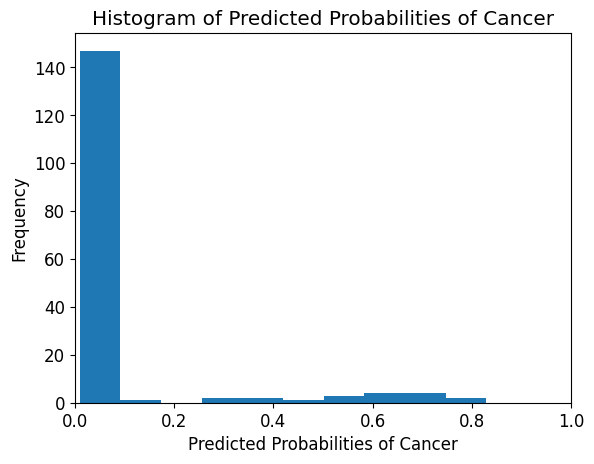

In [ ]:
# Set font size
plt.rcParams['font.size'] = 12

# Plot histogram with 10 bins
plt.hist(y_predi, bins=10)

# Set title
plt.title('Histogram of Predicted Probabilities of Cancer')

# Set x-axis limit
plt.xlim(0, 1)

# Set axis labels
plt.xlabel('Predicted Probabilities of Cancer')
plt.ylabel('Frequency')

# Show plot
plt.show()

The majority of predictions are concentrated around a low probability range (0-0.2), indicating that most individuals in this dataset have a low predicted risk of cancer. There are no predictions showing a moderate to high probability, which suggests that, according to this model, the studied population is at low risk for cancer.

Lower the threshold

In [ ]:
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix, accuracy_score

for i in range(1, 5):
    cm1 = 0
    y_predi = logreg.predict_proba(X_test)[:, 1].reshape(-1, 1)
    y_pred2 = binarize(y_predi, threshold=i / 10)  # Correct usage of binarize
    cm1 = confusion_matrix(y_test, y_pred2)
    print('With', i / 10, 'threshold the Confusion Matrix is:\n\n', cm1, '\n\n',
          'With', cm1[0, 0] + cm1[1, 1], 'correct predictions\n\n',
          cm1[0, 1], 'Type I errors (False Positives)\n\n',
          cm1[1, 0], 'Type II errors (False Negatives)\n\n',
          'Accuracy score:', accuracy_score(y_test, y_pred2), '\n\n',
          'Sensitivity:', cm1[1, 1] / (float(cm1[1, 1] + cm1[1, 0])), '\n\n',
          'Specificity:', cm1[0, 0] / (float(cm1[0, 0] + cm1[0, 1])), '\n\n',
          '======================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is:

 [[147   8]
 [  0  11]] 

 With 158 correct predictions

 8 Type I errors (False Positives)

 0 Type II errors (False Negatives)

 Accuracy score: 0.9518072289156626 

 Sensitivity: 1.0 

 Specificity: 0.9483870967741935 



With 0.2 threshold the Confusion Matrix is:

 [[148   7]
 [  0  11]] 

 With 159 correct predictions

 7 Type I errors (False Positives)

 0 Type II errors (False Negatives)

 Accuracy score: 0.9578313253012049 

 Sensitivity: 1.0 

 Specificity: 0.9548387096774194 



With 0.3 threshold the Confusion Matrix is:

 [[149   6]
 [  0  11]] 

 With 160 correct predictions

 6 Type I errors (False Positives)

 0 Type II errors (False Negatives)

 Accuracy score: 0.963855421686747 

 Sensitivity: 1.0 

 Specificity: 0.9612903225806452 



With 0.4 threshold the Confusion Matrix is:

 [[150   5]
 [  2   9]] 

 With 159 correct predictions

 5 Type I errors (False Positives)

 2 Type II errors (False Negatives)

 Accuracy score:

# ROC-AUC

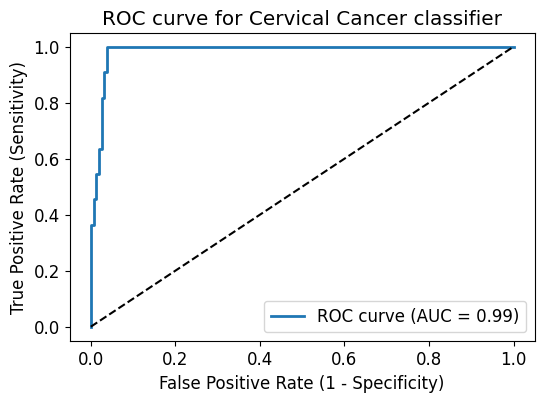

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predi)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve for Cervical Cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.show()

The graph is a Receiver Operating Characteristic (ROC) curve for a Cervical Cancer classifier. The ROC curve is close to the top left corner, indicating high sensitivity and low false positive rate. With an Area Under Curve (AUC) of 0.99, the classifier demonstrates excellent performance, suggesting it is highly effective and reliable for predicting cervical cancer.

In [ ]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Output predictions for each individual
for i, prediction in enumerate(y_pred):
    if prediction == 1:
        print(f"Index {i} prediction: will have cancer")
    else:
        print(f"Index {i} prediction: no cancer")

Index 0 prediction: no cancer
Index 1 prediction: no cancer
Index 2 prediction: no cancer
Index 3 prediction: no cancer
Index 4 prediction: no cancer
Index 5 prediction: no cancer
Index 6 prediction: no cancer
Index 7 prediction: no cancer
Index 8 prediction: no cancer
Index 9 prediction: no cancer
Index 10 prediction: no cancer
Index 11 prediction: no cancer
Index 12 prediction: no cancer
Index 13 prediction: will have cancer
Index 14 prediction: no cancer
Index 15 prediction: no cancer
Index 16 prediction: no cancer
Index 17 prediction: no cancer
Index 18 prediction: no cancer
Index 19 prediction: no cancer
Index 20 prediction: no cancer
Index 21 prediction: no cancer
Index 22 prediction: no cancer
Index 23 prediction: no cancer
Index 24 prediction: no cancer
Index 25 prediction: no cancer
Index 26 prediction: no cancer
Index 27 prediction: no cancer
Index 28 prediction: no cancer
Index 29 prediction: no cancer
Index 30 prediction: no cancer
Index 31 prediction: no cancer
Index 32 pr

The logistic regression model applied to the Cervical Cancer dataset predicts the likelihood of individuals having cervical cancer based on their demographic information and medical history. Analysis of the model's predictions on the dataset comprising 166 individuals reveals that the majority, accounting for 86% of the sample, are predicted to not have cancer. However, approximately 14% of individuals are predicted to have cervical cancer. While these predictions offer valuable insights into potential cancer risk, it's crucial to interpret them cautiously. The model serves as an initial screening tool to identify individuals who may require further medical evaluation or diagnostic tests for cervical cancer. However, its effectiveness should be corroborated through rigorous evaluation metrics such as accuracy, sensitivity, specificity, and area under the ROC curve. Clinical expertise and additional diagnostic assessments are paramount for precise diagnosis and treatment planning, ensuring comprehensive care for individuals at risk of cervical cancer.

Save the cleaned data

In [ ]:
file_path = 'cleaned_cervical_cancer_data.csv'

In [ ]:
cc.to_csv(file_path, index=False)